In [75]:
#importing libraries
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

## Importing data and it's analysis

In [76]:
#importing data
path = r'data/heart.csv'
# path = r'D:\Deep_Learning_Projects\Heart_Disease_Prediction\heart.csv'
df = pd.read_csv(path)

In [77]:
df.shape

(303, 14)

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
#looking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [81]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

In [82]:
df.target.value_counts(normalize = False).round(3)

1    165
0    138
Name: target, dtype: int64

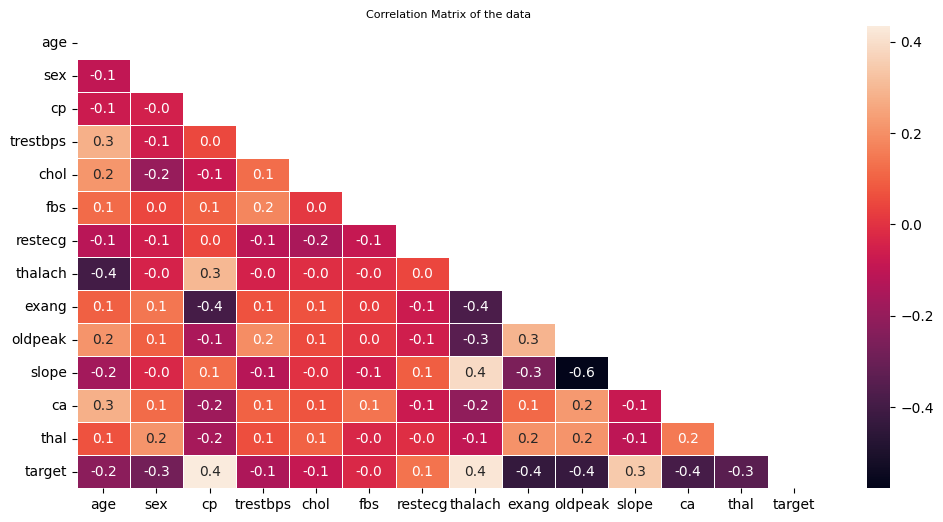

In [83]:
plt.figure(figsize=(12,6))
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot = True, fmt=".1f", linewidth=.5, mask = mask)
plt.title("Correlation Matrix of the data", fontsize = 8);

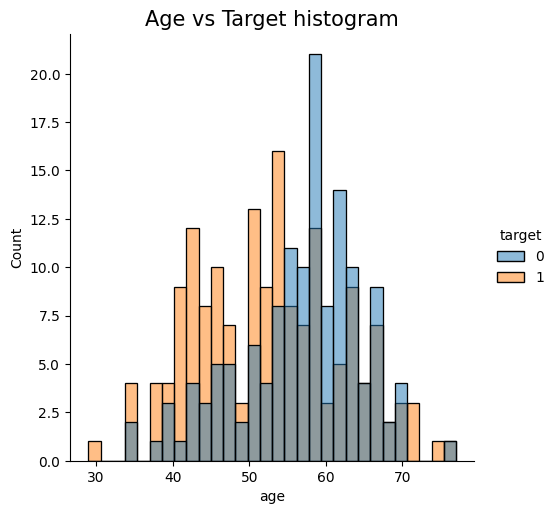

In [84]:
sns.displot(data =df, x = 'age', hue = 'target', kind = 'hist', multiple = 'layer', bins = 30)
plt.title("Age vs Target histogram", fontsize = 15);

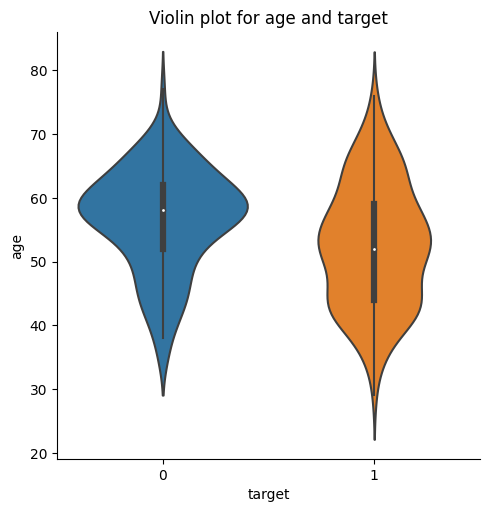

In [85]:
sns.catplot(data = df, x = 'target', y = 'age', kind = 'violin')
plt.title("Violin plot for age and target");

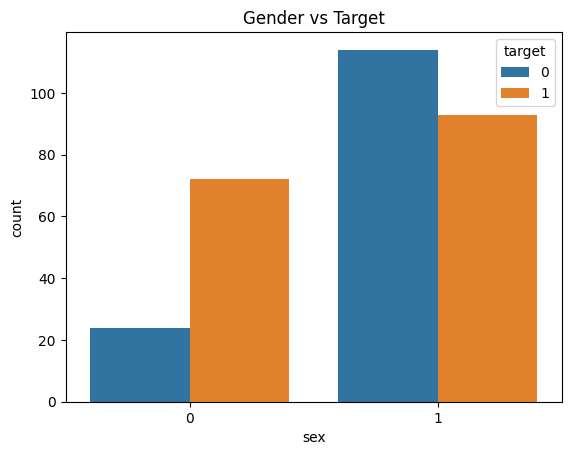

In [86]:
sns.countplot(data =df, x = 'sex',  hue = 'target')
plt.title("Gender vs Target");

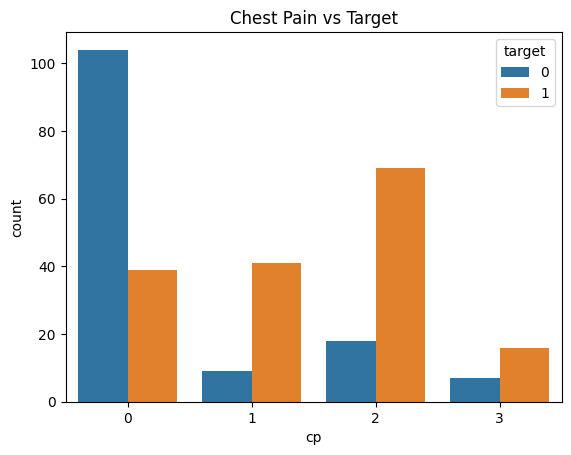

In [87]:
sns.countplot(data =df, x = 'cp',  hue = 'target')
plt.title("Chest Pain vs Target");

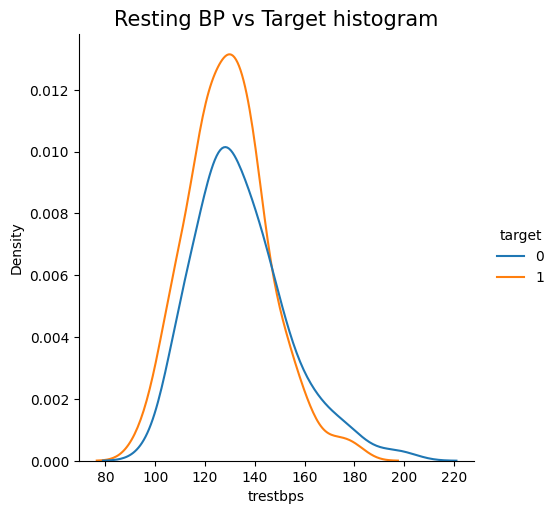

In [88]:
sns.displot(data =df, x = 'trestbps', hue = 'target', kind = 'kde')
plt.title("Resting BP vs Target histogram", fontsize = 15);

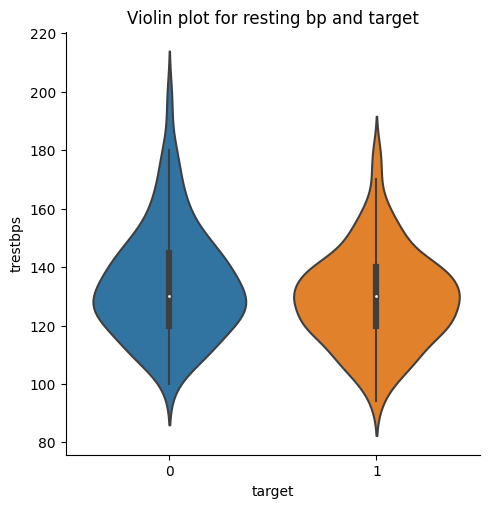

In [89]:
sns.catplot(data = df, x = 'target', y = 'trestbps', kind = 'violin')
plt.title("Violin plot for resting bp and target");

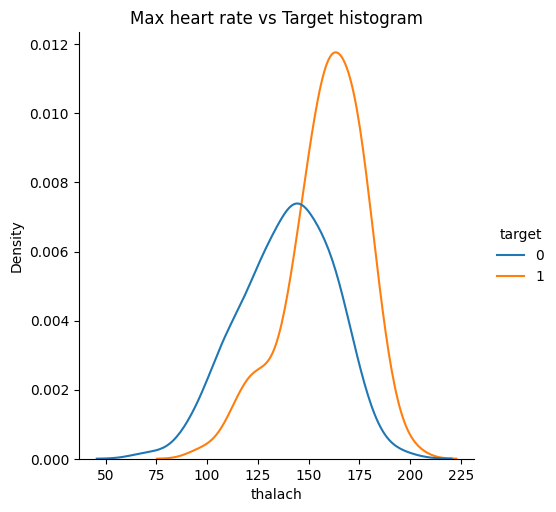

In [90]:
sns.displot(data =df, x = 'thalach', hue = 'target', kind = 'kde')
plt.title("Max heart rate vs Target histogram", fontsize = 12);

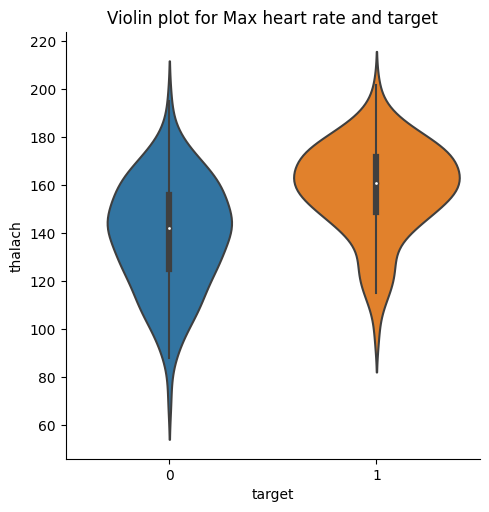

In [91]:
sns.catplot(data = df, x = 'target', y = 'thalach', kind = 'violin')
plt.title("Violin plot for Max heart rate and target");

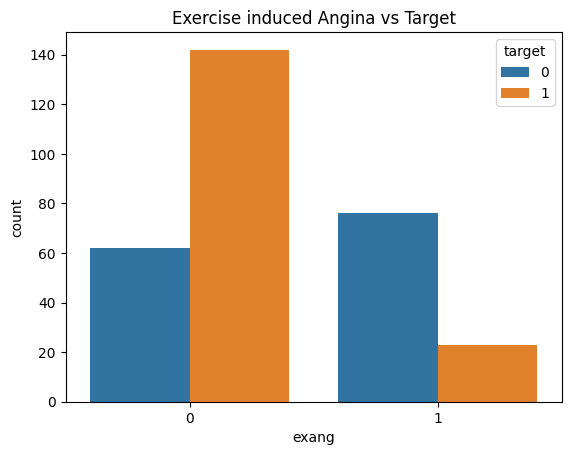

In [92]:
sns.countplot(data =df, x = 'exang',  hue = 'target')
plt.title("Exercise induced Angina vs Target");

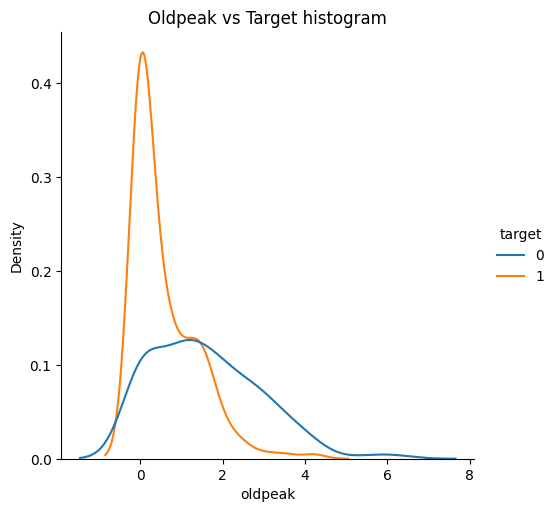

In [93]:
sns.displot(data =df, x = 'oldpeak', hue = 'target', kind = 'kde')
plt.title("Oldpeak vs Target histogram", fontsize = 12);

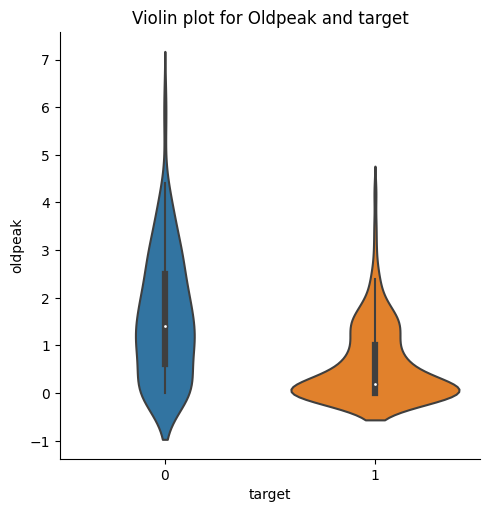

In [94]:
sns.catplot(data = df, x = 'target', y = 'oldpeak', kind = 'violin')
plt.title("Violin plot for Oldpeak and target");

In [95]:
# sns.pairplot(data = df, hue="target", corner=True);

## Model Building

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import BinaryCrossentropy

In [97]:
X = df.drop(columns = 'target')
y = df.target

In [98]:
df.shape

(303, 14)

In [99]:
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_features = [x for x in X.columns if x not in num_features]
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [100]:
pre_processor = ColumnTransformer([('scaler', StandardScaler(), num_features),
                                  ('ohe', OneHotEncoder(), cat_features)], remainder = 'passthrough', verbose = True)  
#('ohe', OneHotEncoder(), cat_features)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)

In [102]:
# y_train_softmax = tf.keras.utils.to_categorical(y_train)
# y_test_softmax = tf.keras.utils.to_categorical(y_test)

In [103]:
X_train_processed = pre_processor.fit_transform(X_train)
X_test_processed = pre_processor.transform(X_test)

[ColumnTransformer] ........ (1 of 2) Processing scaler, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing ohe, total=   0.0s


In [104]:
input_shape = [X_train_processed.shape[1]]
input_shape

[30]

### Creating Model

In [105]:
# define a function to build the keras model
def model_nn():
    # create model
    model = tf.keras.Sequential([
        tf.keras.Input(shape = input_shape),
        
        layers.Dense(16, activation = 'relu', name = 'layer_1'), #input_shape = input_shape,
        layers.BatchNormalization(name = 'BN_1'),
        layers.Dropout(rate = 0.3, name = 'drop_1'),
        
        layers.Dense(8, activation = 'relu', name = 'layer_2'),
        layers.BatchNormalization(name = 'BN_2'),
        layers.Dropout(rate = 0.3, name = 'drop_2'),
    
        # layers.Dense(8, activation = 'relu', name = 'layer_3'),
        # layers.BatchNormalization(name = 'BN_3'),
        # layers.Dropout(rate = 0.3, name = 'drop_3'),
        
        layers.Dense(1, activation = 'sigmoid', name = 'output_layer')
        # layers.Dense(2, activation = 'softmax', name = 'output_layer')
    ])    
    
    # compile model
    model.compile(loss = 'binary_crossentropy',  #categorical_hinge
                  optimizer = 'Adam', 
                  metrics = ['binary_accuracy']) #accuracy #tf.keras.metrics.Precision(name='precision')
    return model

model = model_nn()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 16)                496       
                                                                 
 BN_1 (BatchNormalization)   (None, 16)                64        
                                                                 
 drop_1 (Dropout)            (None, 16)                0         
                                                                 
 layer_2 (Dense)             (None, 8)                 136       
                                                                 
 BN_2 (BatchNormalization)   (None, 8)                 32        
                                                                 
 drop_2 (Dropout)            (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                

In [106]:
# fit the model to the training data
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_binary_accuracy',
    patience = 10,
    min_delta = 0.0001,
    start_from_epoch = 10,
    verbose = 2,
    restore_best_weights = True,
)


history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    batch_size=8,
                    epochs =100, 
                    verbose = 1,
                    callbacks = [early_stopping],
                   )

Epoch 1/100
29/29 [==============================] - 3s 14ms/step - loss: 0.8043 - binary_accuracy: 0.5727 - val_loss: 0.6635 - val_binary_accuracy: 0.5921
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 0.8030 - binary_accuracy: 0.5947 - val_loss: 0.6350 - val_binary_accuracy: 0.6579
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.7448 - binary_accuracy: 0.6344 - val_loss: 0.6094 - val_binary_accuracy: 0.6842
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6393 - binary_accuracy: 0.6608 - val_loss: 0.5891 - val_binary_accuracy: 0.6974
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.5793 - binary_accuracy: 0.6828 - val_loss: 0.5679 - val_binary_accuracy: 0.7105
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6473 - binary_accuracy: 0.6696 - val_loss: 0.5536 - val_binary_accuracy: 0.7368
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - lo

In [107]:
pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.804276,0.572687,0.663506,0.592105
1,0.803037,0.594714,0.635001,0.657895
2,0.744844,0.634361,0.609421,0.684211
3,0.639320,0.660793,0.589093,0.697368
4,0.579335,0.682819,0.567864,0.710526
5,0.647347,0.669604,0.553598,0.736842
6,0.594348,0.665198,0.536821,0.776316
7,0.581520,0.731278,0.527999,0.776316
8,0.556445,0.722467,0.515838,0.802632
9,0.552257,0.748899,0.506952,0.802632


### Model Analysis

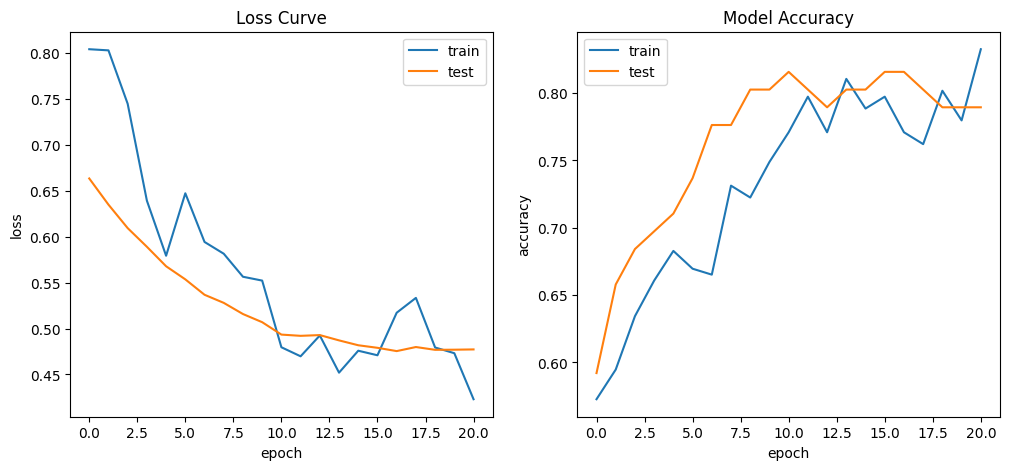

In [108]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].set_title('Loss Curve')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'])


axs[1].plot(history.history['binary_accuracy'])
axs[1].plot(history.history['val_binary_accuracy'])
axs[1].set_title('Model Accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test']);

In [109]:
preds_prob = model.predict(X_test_processed,
              batch_size = 8,
              verbose = 2)

10/10 - 0s - 154ms/epoch - 15ms/step


In [110]:
pred_class = (preds_prob>0.5).astype(int)

In [111]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.78      0.93      0.84        41

    accuracy                           0.82        76
   macro avg       0.83      0.81      0.81        76
weighted avg       0.83      0.82      0.81        76

